Random Forest Algorithm

In [1]:
"""
Random Forest is a popular ensemble learning technique used for both classification and regression tasks in machine learning. It is based on the idea of constructing multiple decision trees during training and outputting the mode (for classification) or average (for regression) prediction of the individual trees.

We use Random Forest Algorithm in our daily lives.

There are two approach:
    1. Simply make decision tree from single dataset
    2. First randomly split same dataset into multiple dataset and create decision tree for each split. After that, we feed sample input to all decision tree and At last, we look for majority decision and finalize it.

NOTE: [ green or red means yes/no OR +ve/-ve in images]
"""


'\nWe use Random Forest Algorithm in our daily lives.\n\n[ green or red means yes/no | +ve/-ve in images]\n\nThere are two approach:\n    1. Simply make decision tree from single dataset\n    2. First randomly split same dataset into multiple dataset and create decision tree for each split. After that, we feed sample input to all decision tree and At last, we look for majority decision and finalize it.\n'

In [2]:
# Identify hand written digits recognition using python and sklearn
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.data[0] # Each sample is of 64 length array, 8X8 colour map of handwritten digit

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

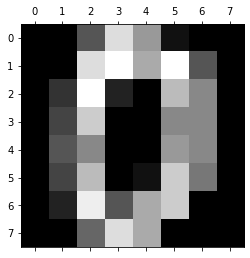

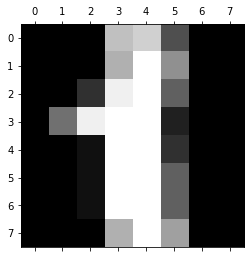

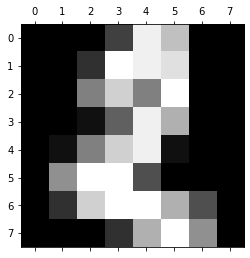

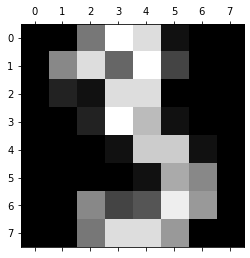

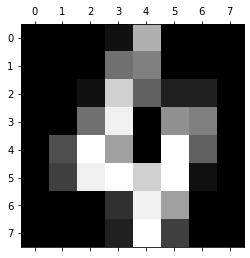

In [6]:
# Visualize digits
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [8]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
X = df.drop('target', axis='columns')
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [15]:
len(X)

1797

In [16]:
"""
- Ensemble methods are ML techniques that create multiple models and then combine them to produce improved results.

- n_estimators: 
    The n_estimators parameter specifies the number of trees in the forest

    The default value for this parameter is 100, which means that 100 different decision trees will be constructed in the random forest.

    [ if tree is more -> increase training time -> Used more computational resources ]

"""

'\n- Ensemble methods are ML techniques that create multiple models and then combine them to produce improved results.\n\n- n_estimators: \n    The n_estimators parameter specifies the number of trees in the forest\n\n    The default value for this parameter is 100, which means that 100 different decision trees will be constructed in the random forest.\n\n    [ if tree is more -> increase training time -> Used more computational resources ]\n\n'

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
model.score(X_test, y_test)

0.9722222222222222

In [19]:
model.predict(X_test)

array([9, 1, 2, 0, 1, 5, 9, 7, 4, 9, 5, 0, 8, 3, 0, 2, 2, 4, 3, 9, 6, 7,
       8, 1, 0, 2, 5, 4, 0, 9, 5, 5, 3, 4, 1, 9, 5, 5, 9, 0, 1, 9, 0, 4,
       4, 9, 3, 2, 0, 8, 6, 0, 5, 7, 1, 7, 7, 5, 2, 8, 8, 5, 7, 1, 5, 0,
       9, 9, 1, 2, 3, 7, 1, 3, 9, 5, 8, 6, 5, 5, 6, 6, 7, 5, 3, 3, 3, 5,
       8, 5, 8, 2, 4, 5, 8, 8, 4, 6, 5, 8, 2, 2, 1, 4, 0, 0, 6, 1, 5, 5,
       5, 0, 2, 2, 7, 6, 0, 0, 8, 6, 1, 4, 4, 1, 4, 8, 8, 5, 6, 5, 4, 3,
       6, 3, 7, 2, 5, 0, 1, 2, 5, 5, 4, 0, 1, 7, 5, 7, 0, 1, 0, 9, 1, 4,
       2, 2, 0, 6, 8, 8, 1, 9, 9, 5, 2, 1, 1, 2, 0, 6, 0, 3, 7, 6, 9, 2,
       3, 9, 3, 5, 3, 7, 4, 0, 1, 5, 7, 6, 5, 9, 9, 5, 5, 3, 7, 5, 4, 3,
       9, 3, 9, 3, 5, 0, 8, 9, 2, 6, 2, 1, 5, 8, 2, 3, 4, 9, 5, 3, 2, 9,
       9, 3, 9, 3, 9, 4, 5, 0, 7, 2, 9, 6, 9, 4, 1, 7, 0, 6, 2, 2, 9, 8,
       4, 7, 7, 6, 4, 4, 0, 1, 1, 5, 4, 7, 4, 6, 2, 3, 1, 5, 3, 7, 7, 9,
       8, 6, 8, 4, 0, 7, 5, 8, 9, 6, 7, 7, 5, 1, 7, 1, 0, 8, 1, 3, 1, 6,
       4, 8, 7, 1, 2, 3, 4, 5, 1, 4, 3, 0, 2, 8, 8,

In [20]:
y_test

608     9
257     1
518     2
1359    0
218     1
       ..
1478    3
1752    1
406     0
82      6
620     6
Name: target, Length: 360, dtype: int32

In [21]:
# Plot Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted

array([9, 1, 2, 0, 1, 5, 9, 7, 4, 9, 5, 0, 8, 3, 0, 2, 2, 4, 3, 9, 6, 7,
       8, 1, 0, 2, 5, 4, 0, 9, 5, 5, 3, 4, 1, 9, 5, 5, 9, 0, 1, 9, 0, 4,
       4, 9, 3, 2, 0, 8, 6, 0, 5, 7, 1, 7, 7, 5, 2, 8, 8, 5, 7, 1, 5, 0,
       9, 9, 1, 2, 3, 7, 1, 3, 9, 5, 8, 6, 5, 5, 6, 6, 7, 5, 3, 3, 3, 5,
       8, 5, 8, 2, 4, 5, 8, 8, 4, 6, 5, 8, 2, 2, 1, 4, 0, 0, 6, 1, 5, 5,
       5, 0, 2, 2, 7, 6, 0, 0, 8, 6, 1, 4, 4, 1, 4, 8, 8, 5, 6, 5, 4, 3,
       6, 3, 7, 2, 5, 0, 1, 2, 5, 5, 4, 0, 1, 7, 5, 7, 0, 1, 0, 9, 1, 4,
       2, 2, 0, 6, 8, 8, 1, 9, 9, 5, 2, 1, 1, 2, 0, 6, 0, 3, 7, 6, 9, 2,
       3, 9, 3, 5, 3, 7, 4, 0, 1, 5, 7, 6, 5, 9, 9, 5, 5, 3, 7, 5, 4, 3,
       9, 3, 9, 3, 5, 0, 8, 9, 2, 6, 2, 1, 5, 8, 2, 3, 4, 9, 5, 3, 2, 9,
       9, 3, 9, 3, 9, 4, 5, 0, 7, 2, 9, 6, 9, 4, 1, 7, 0, 6, 2, 2, 9, 8,
       4, 7, 7, 6, 4, 4, 0, 1, 1, 5, 4, 7, 4, 6, 2, 3, 1, 5, 3, 7, 7, 9,
       8, 6, 8, 4, 0, 7, 5, 8, 9, 6, 7, 7, 5, 1, 7, 1, 0, 8, 1, 3, 1, 6,
       4, 8, 7, 1, 2, 3, 4, 5, 1, 4, 3, 0, 2, 8, 8,

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

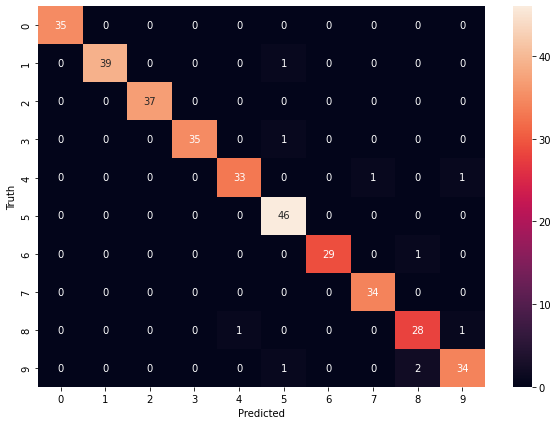

In [23]:
# Visualize Confusion Matrix 
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [24]:
"Note: Except Diagonal in above plot, other value represents where our model made false predictions"

'Note: Except Diagonal in above plot, other value represents where our model made false predictions'